# IBM Employees Analytics: Attrition and Performance

## Introduction


As an HR manager, you want to retain your best employees within the company, but you can't constantly follow-up with each and every one of them, as that would be very time and resource consuming and even if you do, it's not guarantee that you recognize an employee turnover early enough to prevent it. Instead you might relay on an HR analytic solution to understand what are the most frequent situations why an employee decides to leave and build an early warning prediction system, so that you can do something to address it.  

In this notebook we will explore a dataset from IBM. It contains approximately 1500 employee observations with 35 features including performance rating, monthly income, education, job satisfaction, and more.  
The goal is to understand the reasons behind employee turnover, based on factors such as gender, age, income, distance from home and other relevant features and to come up with a model to classify an employee's risk of attrition. At the end of the day we want to come up with retention strategies and recommendations to prevent  on targeted employees

The analysis is focused on the question what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to . Overall, the implementation of this model will allow management to create better decision-making actions.


In [16]:
# Import the necessary modules for analysis and viz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# set notebook environment
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

%precision %.3f
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams["figure.figsize"] = 10,8

pd.set_option('display.width', 100, 
              'display.max_rows', 81,
              'display.max_columns', None
             )


# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

In [18]:
# Load the dataset
df = pd.read_csv("./Datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Get to Know Your Data


In [20]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
print(f"The dataset contains {df.shape[0]} samples and "
      f"{df.shape[1]} features")

The dataset contains 1470 samples and 35 features


The cleaning of the data is usually very time consuming and takes around 80% of the whole process. This dataset is, however, clean and without missing values.

In [28]:
 df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [30]:
print ("\nUnique values :  \n", df.nunique())


Unique values :  
 Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear  

In [32]:
df.describe(include='object',)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


## Data Wrangling

Let's clean our data a bit. We start by deleting all features with only one variable.

In [35]:
# filter variables with one unique value
delete = []
for col in df.columns:
    if df[col].nunique() == 1:
        delete += [col]

In [37]:
df.drop(delete, axis=1, inplace=True);

We have 1470 unique employees and we don't really care about the employees ID number since it contains no valuable information. So the index  will do the job to identify each employee individually.

In [40]:
df.drop(['EmployeeNumber'], axis=1, inplace=True)

Now we update the `object` data types to `category` to save more memory and simplify further processing.

In [43]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [45]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

Now there are only 31 variables left, including our target variable `Attrition`, and 279 KB of memory usage, that is 75% less memory usage compared to the original dataset.

In [48]:
df.describe().loc[['min', 'max']]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
min,18.00,102.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,60.00,"1,499.00",29.00,5.00,4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


There is more we could do to reduce the memory usage. For instance, many features can be converted from `int64` to `int8`.

## Exploratory Data Analysis

Once the data has been cleaned and trimmed, we can move on to explore it. EDA is used to deepen our insight into the dataset. It helps to uncover the underlying structure, detect outliers and anomalies, and rank features based on correlation and causality.  
I usually start by looking at each variable independently and try to find interesting behavior to explore  as well as hypotheses to further investigate.

Let's start by visualizing the overall employee attrition rate for the entire dataset. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be ch

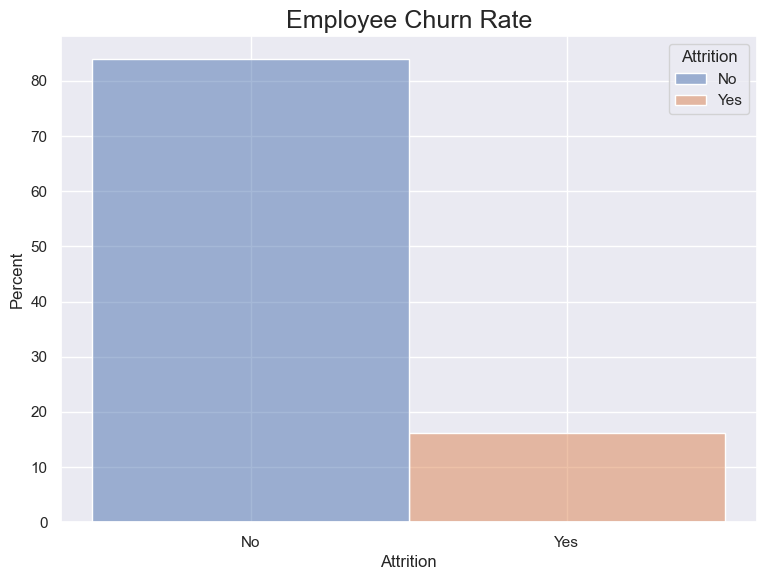

In [52]:
sns.set(style='darkgrid', context='notebook', rc={"figure.figsize":(8, 6)})

ax = sns.histplot(data=df, x='Attrition', hue='Attrition', stat='percent')
plt.title('Employee Churn Rate', fontdict={'fontsize':18});


From the figure above we can see that our target label `Attrition` is severely imbalanced. In fact, about 17% of all employees quit their jobs, which is a lot considering that replacing an employee with an annual salary of \\$35,000 costs the company between \\$17,500 and \\$26,250 and can take as long as six to nine months.    

Class imbalance is a common problem in machine learning. This typically involves models that deal with anomalies, such as credit card fraud detection, disease screening, as well as less serious unbalanced issues such as customer or employee churn. In fact, the purpose of the model is to accurately predict the minority class, not just to achieve high accuracy. In this case, just by predicting the majority class, we already achieve an accuracy of 80%, and in extreme cases, such as the analysis of credit fraud or other problems with an imbalance rate of up to 1:1000 or more, just by following the simple rule of assigning each observation to the majority class, we already achieve an accuracy of 99.90%. Therefore, using accuracy as a predictive measure is not much use when the data is unbalanced. More about this later.

### Factor Income 

In [14]:
sns.set(style='darkgrid', context='notebook', rc={"figure.figsize":(10, 16)})

# create a figure with 4 axes 
fig, ax = plt.subplots(nrows=4, ncols=2)
var_list = ['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'HourlyRate']

for i, var in enumerate(var_list):
    g = sns.histplot(data=df, x=var,multiple='fill', hue='Attrition',
                 stat='percent', kde=True, ax=ax[i, 1])
    sns.kdeplot(data=df, x=var, hue='Attrition', multiple='stack', 
                ax=ax[i, 0])
    
plt.suptitle('Attrition vs. Income & Rate', fontsize=18)
plt.tight_layout();

NameError: name 'sns' is not defined

We don't know exactly what *Rate means, since no explanation has been provided by IBM. However, from the figures above we can see that attrition is more affected by the monthly incomes that any other plotted variable.

The income variable shows a clear pattern: 
* Most people that leaves the company are the less payed. Which is understandable, who wanna stick to a company who pays minimum wage salaries.
* The second group are, obviously, the one who belongs to the second worse salary in the company.

Let's plot again the attrition rate in relation to `MonthlyIncome`.

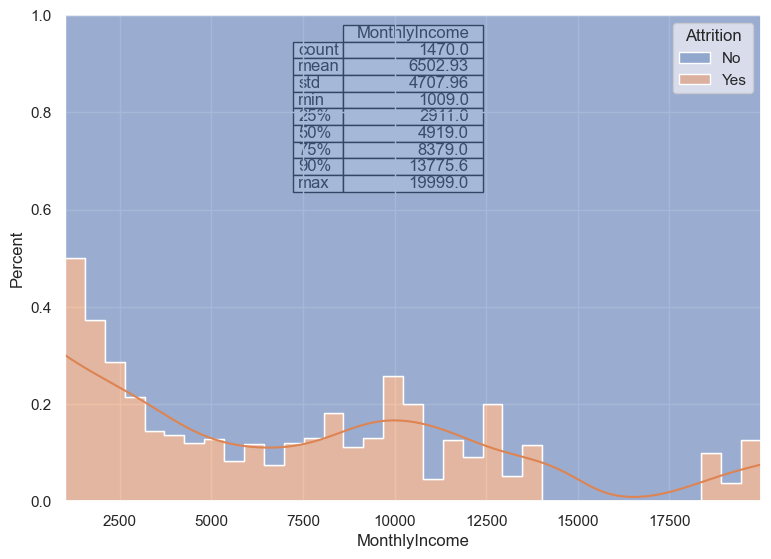

In [46]:
sns.set(style='darkgrid', context='notebook', rc={"figure.figsize":(8, 6)})
g = sns.histplot(data=df, x='MonthlyIncome', multiple='fill', hue='Attrition',
                 stat='percent', element='step', kde=True, bins=35, )
pd.plotting.table(g, np.round(df['MonthlyIncome'].describe(percentiles=[.25, .5, .75, .9]), 2), 
                  loc='upper center', colWidths=[.2, .3, .3, .3]);

Interesting to see another jump in the employee attrition for salaries around $10,000 as well as for the highest payed salary. Let's see if we can come up with a good explanation for this behavior.

### Attrition vs. Distance From Home

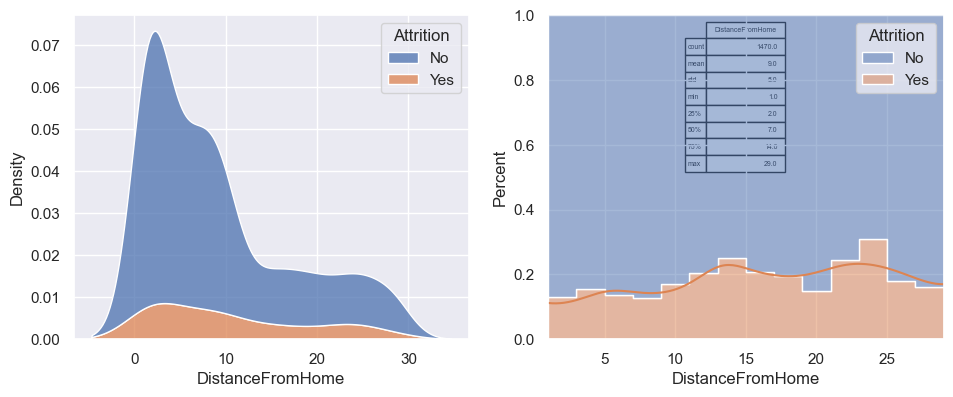

In [78]:
sns.set(style = 'darkgrid', context = 'notebook', rc = {"figure.figsize": (10, 4)})

fig, ax = plt.subplots(nrows=1, ncols=2)
g = sns.histplot(data=df, x='DistanceFromHome', hue='Attrition',multiple='fill',
                 stat='percent', element='step', kde=True, ax = ax[1])
sns.kdeplot(data=df, x='DistanceFromHome', hue='Attrition', multiple='stack', 
                ax=ax[0])
pd.plotting.table(g, np.round(df['DistanceFromHome'].describe()), 
                  loc='upper center', colWidths=[.2, .3, .3, .3]);

We don't know how far the company is from home since there isn't any accurate distance information, but we can see that some interesting facts. .

The `DistanceFromHome` variable shows a clear pattern: 
* This is related with the attrition absolutely, but has an overall trend about the relationship between these two variables. In a word, the farther from home, the more attrition there is.
* But We can see that this variable is less related with attrition than `MonthlyIncome`. 

### Attrition vs. Performance Rating

<Axes: xlabel='PerformanceRating', ylabel='Density'>

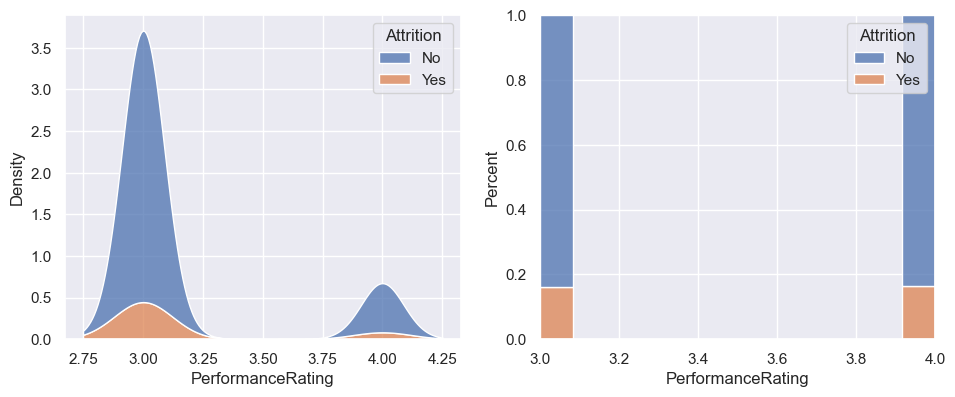

In [102]:
sns.set(style = 'darkgrid', context = 'notebook', rc = {"figure.figsize": (10, 4)})

fig, ax = plt.subplots(nrows=1, ncols=2)
g = sns.histplot(data=df, x='PerformanceRating', multiple='fill', hue='Attrition',
                 stat='percent', kde=False, ax=ax[1])
sns.kdeplot(data=df, x='PerformanceRating', hue='Attrition', multiple='stack', 
                ax=ax[0])

As we can see, the relationship between attribution and performance rating is very low. I think this is not so good. In general, the ideal distribution of this is that the higher `PerformanceRating`, the lower `Attrition` is. We have to try the more policies that satisfy these people.